In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import pandas as pd
import seaborn as sns
sns.set()

import plotly.express as px

Multiple Regression

* What if more than one variable influnecs the one we're intersted in?

* Example: predicting a price for a car based on its many attributes (body type, brand, mileage, cylinders, doors, etc...)

* `
NB:` If we also have multiple dependent variables (things we're trying to predict) => that's `multivariate regression`

* It's just a regression that takes more than 1 feature into account

* Still uses least squares

* We just end up with coefficients for each factor


* For example: $$ price = \alpha + \beta_{1}mileage + \beta_{2}age + \beta_{3}doors$$

* Theses coefficients imply how important each factor is ( if the dada is all normalized)

* Get rid of ones that don't matter!

* Can still measure fit with r-squared

* Need to assume the different factors are not themselves dependent on each pther.

Data set of Blue Book car values

In [3]:
df = pd.read_excel('http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls')

In [4]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


                     Mileage         Price
Mileage                                   
(0, 10000]       5588.629630  24096.714451
(10000, 20000]  15898.496183  21955.979607
(20000, 30000]  24114.407104  20278.606252
(30000, 40000]  33610.338710  19463.670267


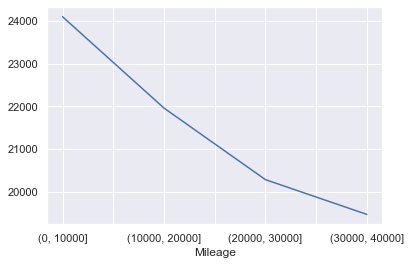

In [6]:
df1 = df[['Mileage', 'Price']]
bins = np.arange(0, 50000, 10000) # bucket things to 10.000 mileage ranges
groups = df1.groupby(pd.cut(df1['Mileage'], bins)).mean() # bucket things to mileage ranges
print(groups.head())
groups['Price'].plot.line();

As we can from the above, as the mileage goes up, the price for sales goes down.

Let's scale our feature data into the same range so we can easily compare the coefficient we end up with:

In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

X = df[['Mileage', 'Cylinder', 'Doors']]
y = df[['Price']]

X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].as_matrix())

print(X)

est = sm.OLS(y, X).fit()

est.summary()